# Решающие деревья для задач классификации и регрессии
Группа: ИВТ-М20.<br/>
Студент: Архипов Дмитрий Алексеевич

In [23]:
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import graphviz
from typing import Union, Any
from numpy import arange
from pandas import (
    DataFrame,
    read_csv
)
from sklearn.tree import export_graphviz
from sklearn.metrics import (
    accuracy_score,
    r2_score,
    mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
warnings.filterwarnings('ignore')


## 1. Прочтите данные из файлов

In [13]:
transformators: DataFrame = DataFrame(
    read_csv(
        'data/transformators.csv',
        sep=',',
        header=0
    )
)
regression: DataFrame = DataFrame(
    read_csv(
        'data/transformators_regression.csv',
        sep=',',
        header=0
    )
)

## 2. Отобразите несколько первых и несколько последних записей.

In [14]:
print(transformators.head())
print(transformators.tail())
print(regression.head())
print(regression.tail())

         H2        CO      C2H4      C2H2  label
0  0.002590  0.016491  0.002876  0.000336      1
1  0.002825  0.014728  0.001992  0.000339      1
2  0.002764  0.017030  0.003394  0.000195      1
3  0.000508  0.016334  0.004104  0.000380      1
4  0.002654  0.021278  0.004068  0.000124      1
            H2        CO      C2H4      C2H2  label
2095  0.002549  0.009460  0.007465  0.000242      1
2096  0.000915  0.005770  0.007230  0.000081      3
2097  0.001565  0.002492  0.008529  0.000176      3
2098  0.001688  0.020291  0.007305  0.000252      1
2099  0.002935  0.028001  0.008048  0.000219      1
         H2        CO      C2H4      C2H2  label
0  0.002590  0.016491  0.002876  0.000336    541
1  0.002825  0.014728  0.001992  0.000339    520
2  0.002764  0.017030  0.003394  0.000195    583
3  0.000508  0.016334  0.004104  0.000380    487
4  0.002654  0.021278  0.004068  0.000124   1093
            H2        CO      C2H4      C2H2  label
2095  0.002549  0.009460  0.007465  0.000242   1

## 3. Разбейте данные для классификации

In [15]:
transformators_train, transformators_test = train_test_split(transformators, test_size=0.3, train_size=0.7)

## 4. Примените алгоритм дерева решений

In [26]:
clf: DecisionTreeClassifier = DecisionTreeClassifier()
clf.fit(transformators_train, transformators_train.label)


DecisionTreeClassifier()

## 5. Сделайте предсказание на тестовой выборке.

In [17]:
test: object = transformators_test.label
pred: object = clf.predict(transformators_test
                           )
print(f"Prediction: {pred}")

Prediction: [1 1 1 3 4 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 3 1 1 1 1 1
 1 1 1 4 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 4 1 1 1 1 4 1
 1 4 1 1 4 1 4 3 1 1 1 1 1 1 4 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 3 4 1 1 1 1 1 1 1 1 4 1 3 1 3 1 1 1 1 3 1 1 1 1 4 1 1 3 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 3 1 1 1 1 1 4 1
 1 1 3 1 1 1 1 1 3 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1
 1 1 1 4 4 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 3 4 1 1 1 1 1 3 1 1 1 3 1 4 1
 1 4 1 1 4 1 1 4 1 1 1 1 1 1 3 4 1 1 1 1 4 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 4 1 1 3 1 3 1 1 3 1 1 1 1 1 4 1 1 3 1 1
 4 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 4 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 4 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 4 1 4 1 1 

In [18]:
y_true = transformators_test.label
y_pred = clf.predict(transformators_test
                     )

print(accuracy_score(y_true, y_pred, normalize=True))
print(classification_report(y_true, y_pred))

0.9619047619047619
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       517
           2       0.00      0.00      0.00        24
           3       0.55      1.00      0.71        29
           4       1.00      1.00      1.00        60

    accuracy                           0.96       630
   macro avg       0.64      0.75      0.68       630
weighted avg       0.94      0.96      0.95       630



## 6. Выполните подбор гиперпараметров модели

In [19]:
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[x for x in range(0,150,10)],
    'min_samples_split': [x for x in range(0,10,2)],
    'min_samples_leaf': [x for x in range(0,15,3)]
}
grid: GridSearchCV = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    cv=5
)
gs_result: Union[GridSearchCV, Any] = grid.fit(transformators_train, transformators_train.label)
print(gs_result)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100, 110, 120, 130, 140],
                         'min_samples_leaf': [0, 3, 6, 9, 12],
                         'min_samples_split': [0, 2, 4, 6, 8]})


## 7. Заново обучите модель с подобранными гиперпараметрами

In [20]:
print(gs_result.best_params_)
print(gs_result.best_score_)
print(gs_result.predict(transformators_test))

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6}
1.0
[1 1 1 3 4 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 3 1 1 1 1 1
 1 1 1 4 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 4 1 1 1 1 4 1
 1 4 1 1 4 1 4 3 1 1 1 1 1 1 4 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 4 1 1 1 1 1 1 1 1 4 1 3 1 2 1 1 1 1 3 1 1 1 1 4 1 1 2 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 2 1 1 1 1 1 4 1
 1 1 3 1 1 1 1 1 3 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1
 1 1 1 4 4 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 3 4 1 1 1 1 1 2 1 1 1 3 1 4 1
 1 4 1 1 4 1 1 4 1 1 1 1 1 1 2 4 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 4 1 1 3 1 3 1 1 3 1 1 1 1 1 4 1 1 2 1 1
 4 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 4 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1

In [21]:
y_true = transformators_test.labe
l
y_pred = gs_result.predict(transformators_test)

print(accuracy_score(y_true, y_pred, normalize=True))
print(classification_report(y_true, y_pred))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        60

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



## 8. Постройте итоговое дерево классификации

[Text(133.92000000000002, 190.26, 'X[4] <= 1.5\ngini = 0.333\nsamples = 1470\nvalue = [1188, 65, 84, 133]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 1188\nvalue = [1188, 0, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[4] <= 3.5\ngini = 0.636\nsamples = 282\nvalue = [0, 65, 84, 133]'),
 Text(133.92000000000002, 81.53999999999999, 'X[2] <= 0.002\ngini = 0.492\nsamples = 149\nvalue = [0, 65, 84, 0]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 65\nvalue = [0, 65, 0, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 84\nvalue = [0, 0, 84, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 133\nvalue = [0, 0, 0, 133]')]

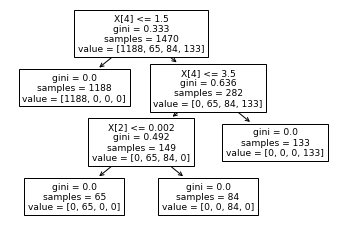

In [28]:
tree.plot_tree(clf)

## 9. Разбейте данные для регрессии

In [29]:
regression_train, regression_test = train_test_split(regression, test_size=0.3, train_size=0.7)

## 10. Примените алгоритм дерева регрессии


In [30]:
clf: DecisionTreeRegressor = DecisionTreeRegressor()
clf.fit(regression_train, regression_train.label)

DecisionTreeRegressor()

## 11. Сделайте предсказание на тестовой выборке

In [31]:
test: object = regression_test.label
pred: object = clf.predict(regression_test)
print(f"Prediction: {pred}")

print(f"r2_score: {round(r2_score(test, pred), 3)}")
print(f"mean_absolute_error: {round(mean_absolute_error(test, pred), 3)}")

Prediction: [ 643. 1093.  525. 1093.  573.  467. 1093.  752.  485.  573.  443. 1093.
 1093.  655.  526.  892.  716. 1093.  496. 1093. 1093.  528.  929.  718.
 1093. 1093.  934.  612.  600.  862. 1093. 1093. 1093.  578.  716.  652.
  812.  774.  468.  503.  525. 1093.  607. 1093.  580. 1093.  512. 1093.
  504.  773. 1093. 1093. 1093. 1093. 1093.  514. 1093. 1093.  529. 1093.
 1093.  476.  632.  498.  857. 1093.  514.  729. 1093.  581.  547. 1093.
  807.  421.  756. 1093.  589. 1093.  840.  530.  497.  475.  850. 1093.
  870.  880.  549. 1093.  604. 1093.  785.  611.  567.  524. 1093.  759.
 1093.  542. 1093. 1093. 1093.  598.  771.  643.  723. 1093.  571.  490.
 1093.  749. 1093.  815.  551.  632. 1093.  488. 1093.  696.  536.  478.
  662.  580. 1093. 1068.  501.  564.  565.  906. 1093.  539.  758.  483.
 1093.  567.  529. 1093.  658.  645. 1093. 1093. 1093.  825.  878. 1093.
 1093.  930.  697.  494.  867. 1093. 1093. 1093. 1093.  737.  761.  742.
  477.  684. 1093.  505. 1093. 1093. 10

## 12. Выполните подбор гиперпараметров модели

In [32]:
parameters = {
    'splitter':('best','random'),
    'max_depth': arange(1,10),
    'min_samples_split': arange(2,10),
    'min_samples_leaf': arange(1,5)
}
grid: GridSearchCV = GridSearchCV(
    DecisionTreeRegressor(),
    parameters,
    cv=5
)
gs_result: Union[GridSearchCV, Any] = grid.fit(regression_train, regression_train.label)
print(gs_result)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ('best', 'random')})


## 13. Заново обучите модель с подобранными гиперпараметрам

In [33]:
print(gs_result.best_params_)
print(gs_result.best_score_)
print(gs_result.predict(regression_test))
pred: object = gs_result.predict(regression_test)

print(f"r2_score: {round(r2_score(test, pred), 3)}")
print(f"mean_absolute_error: {round(mean_absolute_error(test, pred), 3)}")

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}
0.9999313873560697
[ 644.4        1093.          524.14285714 1093.          571.5
  465.6        1093.          751.8         484.90909091  571.5
  442.         1093.         1093.          653.66666667  527.3125
  894.66666667  716.6        1093.          494.85714286 1093.
 1093.          527.3125      924.          716.6        1093.
 1093.          939.          611.25        598.07692308  862.
 1093.         1093.         1093.          576.85714286  716.6
  651.66666667  812.71428571  774.66666667  469.          504.
  524.14285714 1093.          608.2        1093.          580.
 1093.          511.57894737 1093.          504.          772.66666667
 1093.         1093.         1093.         1093.         1093.
  515.17647059 1093.         1093.          527.3125     1093.
 1093.          477.55555556  629.25        497.8         857.66666667
 1093.          515.17647059  728.         1093.       

## 14. Постройте итоговое дерево регрессии

[Text(232.49873641304347, 208.38, 'X[4] <= 835.5\nmse = 59474.878\nsamples = 1470\nvalue = 793.958'),
 Text(144.7539945652174, 190.26, 'X[4] <= 632.5\nmse = 12654.571\nsamples = 869\nvalue = 608.649'),
 Text(74.42021739130435, 172.14, 'X[4] <= 533.5\nmse = 2649.614\nsamples = 536\nvalue = 530.869'),
 Text(35.69380434782609, 154.01999999999998, 'X[4] <= 479.5\nmse = 919.752\nsamples = 285\nvalue = 490.688'),
 Text(14.101630434782608, 135.89999999999998, 'X[4] <= 444.0\nmse = 517.991\nsamples = 83\nvalue = 451.904'),
 Text(4.306304347826087, 117.77999999999999, 'X[4] <= 405.5\nmse = 379.76\nsamples = 25\nvalue = 424.2'),
 Text(0.9704347826086956, 99.66, 'X[1] <= 0.019\nmse = 134.0\nsamples = 4\nvalue = 384.0'),
 Text(0.4852173913043478, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 366.0'),
 Text(1.4556521739130435, 81.53999999999999, 'X[4] <= 393.0\nmse = 34.667\nsamples = 3\nvalue = 390.0'),
 Text(0.9704347826086956, 63.41999999999999, 'X[4] <= 386.0\nmse = 4.0\nsamples = 2\nvalu

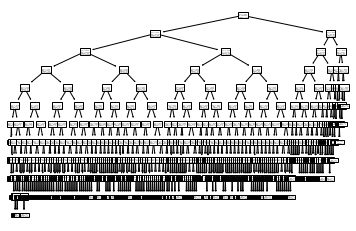

In [35]:
tree.plot_tree(clf)

# Ответы на контрольные вопросы

## 1. Опишите этапы построения алгоритма дерева решений для задачи классификации и регрессии. Чем они отличаются и чем схожи?


## 2. Какие метрики используются для оценки качества работы алгоритмов при решении задачи регрессии? Опишите данные метрики с математической точки зрения и скажите, чем они отличаются друг от друга.


## 3. Каким способом можно повысить качество работы алгоритмов регрессии?